In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import category_encoders as ce


# Take a look at Scalers again. Switch from robust to some other or log those cols

# Move splitting after feature selection or maybe ? (there are scalers in splits)

# Explanatory Data Analysis

In [61]:
df = pd.read_csv("weatherAUS.csv")
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.RainToday.value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [6]:
df.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [7]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
df.Rainfall.isna().sum()

3261

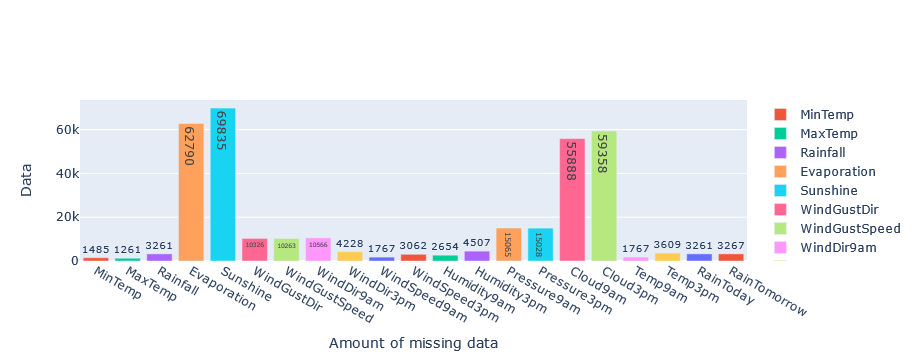

In [9]:
#Plot amount of missing data points in each column
fig = go.Figure(data=[go.Bar()])

for col in df.columns:
    missing_amount = df[col].isna().sum() 
    if missing_amount > 0:
        fig.add_trace(go.Bar(name=col,
                             x=[col], 
                             y=[missing_amount],
                             text=[missing_amount]))

fig.update_xaxes(title_text="Amount of missing data")
fig.update_yaxes(title_text="Data")
fig.update_layout(barmode='group')
fig.show()

In [10]:
df.Sunshine.describe()

count    75625.000000
mean         7.611178
std          3.785483
min          0.000000
25%          4.800000
50%          8.400000
75%         10.600000
max         14.500000
Name: Sunshine, dtype: float64

In [11]:
df.Evaporation.describe()

count    82670.000000
mean         5.468232
std          4.193704
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64

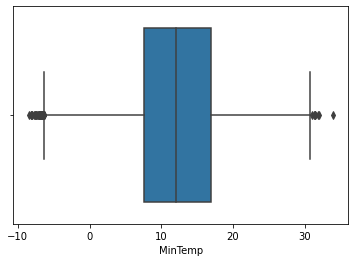

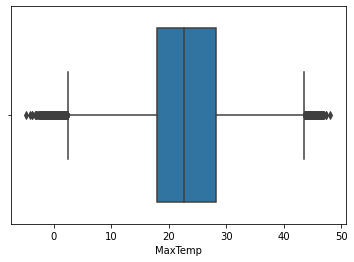

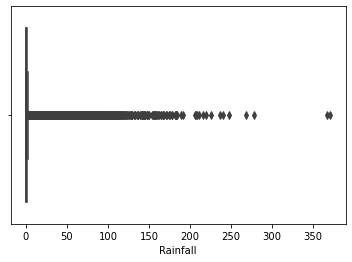

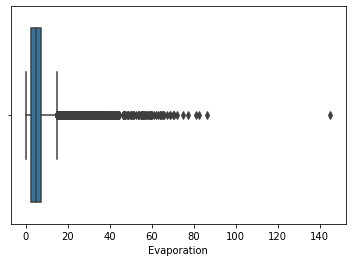

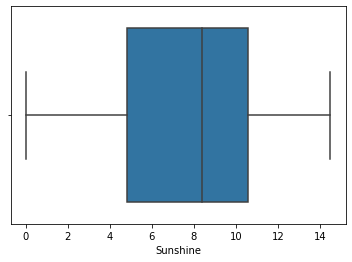

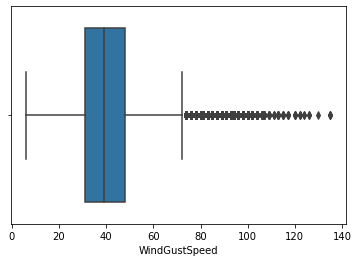

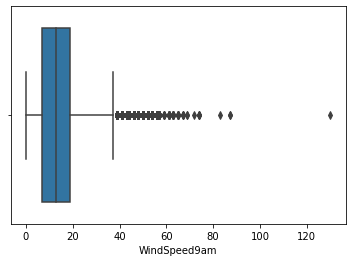

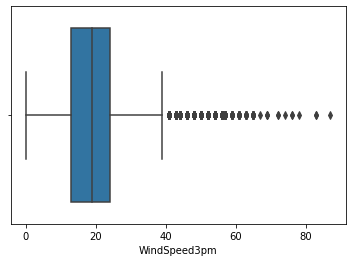

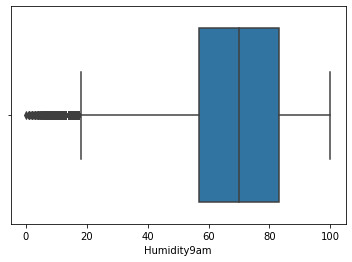

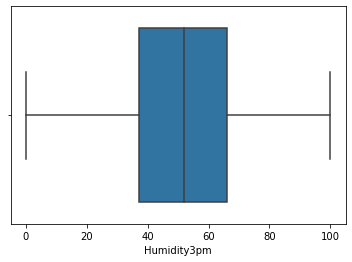

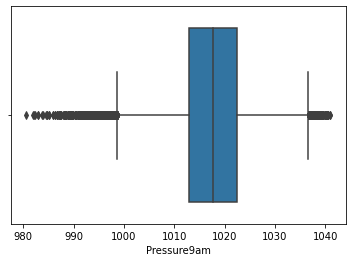

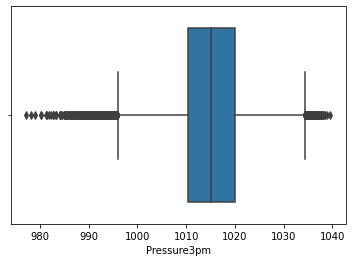

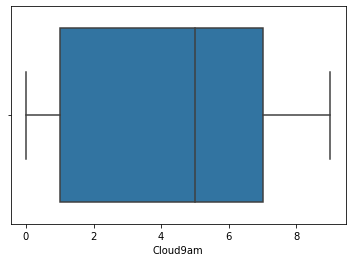

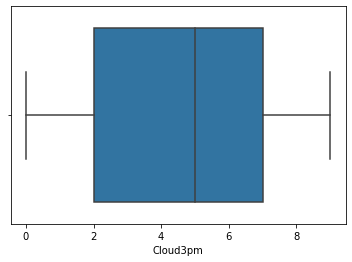

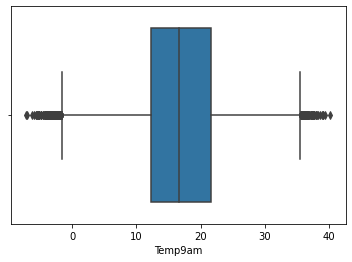

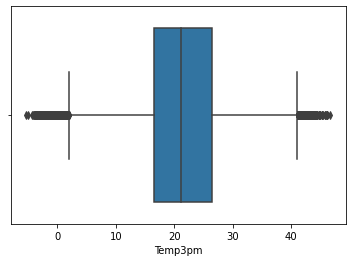

In [12]:
#Checking boxplots for columns with outliers
for col in df.select_dtypes(include="float64").columns:
    sns.boxplot(x=df[col])
    plt.show()

In [13]:
#Check for the amount of outliers in each numerical column
cols_with_outliers = []
for col in df.select_dtypes(include="float64").columns:
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_lim = df[col].quantile(0.25) - (IQR * 1.5)
    upper_lim = df[col].quantile(0.75) + (IQR * 1.5)
    outlier_amount = df[(df[col] < lower_lim) | (df[col] > upper_lim)].shape[0]
    
    if outlier_amount > 0:
        cols_with_outliers.append(col)
    
    #print(col, "Lower limit =", lower_lim, "and Upper limit =", upper_lim)
    print(col, "has", outlier_amount, "outliers")
    

MinTemp has 54 outliers
MaxTemp has 489 outliers
Rainfall has 25578 outliers
Evaporation has 1995 outliers
Sunshine has 0 outliers
WindGustSpeed has 3092 outliers
WindSpeed9am has 1817 outliers
WindSpeed3pm has 2523 outliers
Humidity9am has 1425 outliers
Humidity3pm has 0 outliers
Pressure9am has 1191 outliers
Pressure3pm has 919 outliers
Cloud9am has 0 outliers
Cloud3pm has 0 outliers
Temp9am has 262 outliers
Temp3pm has 764 outliers


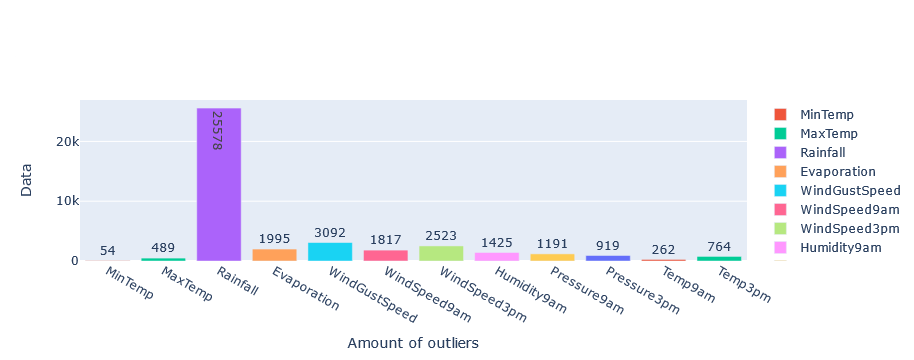

In [14]:
#Plot amount of outlier data points in each column
fig = go.Figure(data=[go.Bar()])

for col in cols_with_outliers:
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_lim = df[col].quantile(0.25) - (IQR * 1.5)
    upper_lim = df[col].quantile(0.75) + (IQR * 1.5)
    outlier_amount = df[(df[col] < lower_lim) | (df[col] > upper_lim)].shape[0]
    
    fig.add_trace(go.Bar(name=col,
                         x=[col], 
                         y=[outlier_amount],
                         text=outlier_amount))
    
fig.update_xaxes(title_text="Amount of outliers")
fig.update_yaxes(title_text="Data")
fig.update_layout(barmode='group')
fig.show()

In [15]:
df.Rainfall.describe()

count    142199.000000
mean          2.360918
std           8.478060
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

In [16]:
#Extract year info from Date column
df_date = df.copy()
df_date["Date"] = pd.to_datetime(df_date["Date"])
df_date["Year"] = df_date["Date"].dt.year

In [17]:
#View amount of data points per year
for year in df_date["Year"].unique():
    print("Year", year, "has", df_date.loc[df_date.Year == year].shape[0], "data points")

Year 2008 has 2270 data points
Year 2009 has 16789 data points
Year 2010 has 16782 data points
Year 2011 has 15407 data points
Year 2012 has 15409 data points
Year 2013 has 16415 data points
Year 2014 has 17885 data points
Year 2015 has 17885 data points
Year 2016 has 17934 data points
Year 2017 has 8623 data points
Year 2007 has 61 data points


In [18]:
#We can delete observetions of year 2007 and 2008 as they contain little info
df_date = df_date.loc[df_date["Year"] != 2007]
df_date = df_date.loc[df_date["Year"] != 2008]

#We can also drop observations of year 2017 as they dont cover the whole year
df_date = df_date.loc[df_date["Year"] != 2017]

In [19]:
df_date.groupby(by="Year").mean()

MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
Year                                                                         
2009  12.160258  23.251019  2.166385     5.555666  7.905102      41.429908   
2010  12.093076  22.571247  2.710924     4.812517  7.277599      39.384277   
2011  12.022364  22.540180  2.829197     4.926629  7.313705      39.868646   
2012  11.225459  22.311424  2.416200     5.023575  7.580733      39.888904   
2013  11.896953  23.290936  2.272402     5.478082  7.663279      40.769917   
2014  12.405206  23.792739  1.966341     5.918710  7.793905      40.063608   
2015  12.235738  23.515652  2.160753     5.890961  7.689140      39.731118   
2016  12.565211  23.419984  2.384054     6.174684  7.646902      40.251158   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
Year                                                                      
2009     14.514439     19.543932    67.266126    50.083950  1016.828290   
2010     13.883884     18.459077    70.788379    53.932934  1018.190177   
2011     14.134900     18.440913    70.539129    53.819475  1017.286005   
2012     14.026955     18.596769    68.896674    51.471879  1017.983022   
2013     14.348313     19.021594    67.501632    50.265500  1017.129798   
2014     13.898752     18.508973    67.825234    50.296913  1017.927982   
2015     13.956801     18.527159    68.244000    50.571641  1019.131151   
2016     14.205337     18.822257    69.424885    52.298932  1016.676044   

      Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm  
Year                                                         
2009  1014.468909  4.126626  4.209338  16.946829  21.796859  
2010  1015.867080  4.483200  4.694837  16.652613  21.114127  
2011  1015.044349  4.446849  4.569086  16.671886  21.096064  
2012  1015.584242  4.238784  4.396656  16.238956  20.895981  
2013  1014.680569  4.208273  4.327394  16.926758  21.754635  
2014  1015.466446  4.394281  4.352213  17.323651  22.262789  
2015  1016.663474  4.500835  4.515207  17.128412  21.907791  
2016  1014.241477  4.953543  5.004917  17.262754  21.688856

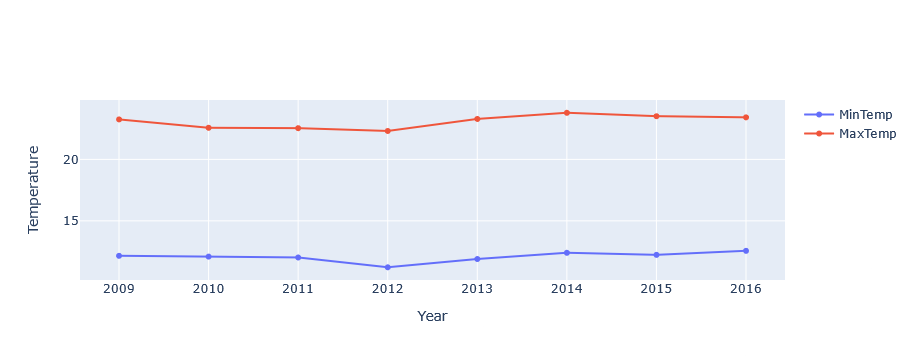

In [20]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_date["Year"].unique(), 
                         y=df_date.groupby(by="Year").mean()["MinTemp"],
                         mode='lines+markers',
                         name="MinTemp"))

fig.add_trace(go.Scatter(x=df_date["Year"].unique(), 
                         y=df_date.groupby(by="Year").mean()["MaxTemp"],
                         mode='lines+markers',
                         name="MaxTemp"))

fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Temperature")
fig.show()

If we zoom into either plot we can see that temperature is slowly increasing

In [21]:
#Replace Yes and No values in RainToday and RainTomorrow columns to 1 and 0 respectively
df_date.replace(to_replace=["Yes", "No"], value=[1, 0], inplace=True)

In [22]:
#Amount of obseravations each year where it rained that day
df_date.groupby(by="Year").sum().RainToday

Year
2009    3595.0
2010    4009.0
2011    3735.0
2012    3394.0
2013    3465.0
2014    3554.0
2015    3651.0
2016    4180.0
Name: RainToday, dtype: float64

# Feature engineering

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Date           145460 non-null  category
 1   Location       145460 non-null  category
 2   MinTemp        143975 non-null  float64 
 3   MaxTemp        144199 non-null  float64 
 4   Rainfall       142199 non-null  float64 
 5   Evaporation    82670 non-null   float64 
 6   Sunshine       75625 non-null   float64 
 7   WindGustDir    135134 non-null  category
 8   WindGustSpeed  135197 non-null  float64 
 9   WindDir9am     134894 non-null  category
 10  WindDir3pm     141232 non-null  category
 11  WindSpeed9am   143693 non-null  float64 
 12  WindSpeed3pm   142398 non-null  float64 
 13  Humidity9am    142806 non-null  float64 
 14  Humidity3pm    140953 non-null  float64 
 15  Pressure9am    130395 non-null  float64 
 16  Pressure3pm    130432 non-null  float64 
 17  Cloud9am  

In [62]:
#Changing dtype from object to category
select = df.select_dtypes(include="object").columns
df[select] = df[select].astype("category")

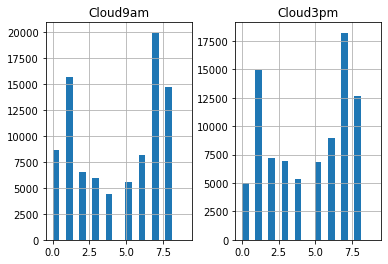

In [34]:
#Data distribution in Cloud column before 
show = ["Cloud9am", "Cloud3pm"]
df[show].hist(bins=20)
plt.show()

In [75]:
#Filling nans in cloud columns
df.Cloud9am = df.Cloud9am.fillna(method="bfill").fillna(value=df.Cloud9am.mean())
df.Cloud3pm = df.Cloud3pm.fillna(method="bfill").fillna(value=df.Cloud3pm.mean())

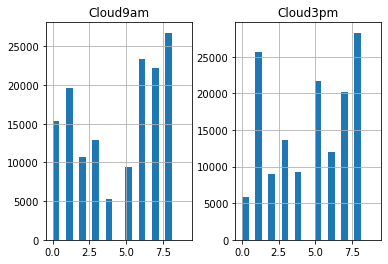

In [36]:
show = ["Cloud9am", "Cloud3pm"]
df[show].hist(bins=20)
plt.show()

In [37]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am             0
Cloud3pm             0
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [76]:
#Dropping uninformative columns
df.drop(columns=["Date", "Location"], axis=1, inplace=True)

KeyError: "['Date' 'Location'] not found in axis"

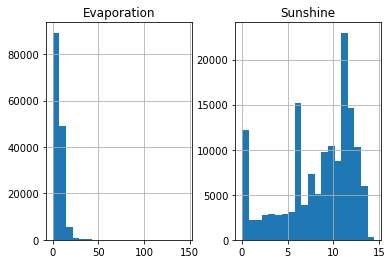

After NaN were filled


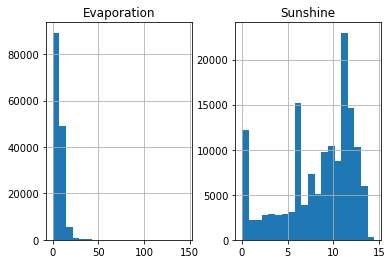

In [77]:
#Data distribution in columns with most NA values
isna_cols = ["Evaporation", "Sunshine"]
df[isna_cols].hist(bins=20)
plt.show()

#Filling NaNs
df.Evaporation = df.Evaporation.fillna(method="bfill").fillna(value=df.Evaporation.mean())
df.Sunshine = df.Sunshine.fillna(method="bfill").fillna(value=df.Sunshine.mean())

#Data distribution in columns after filling
print("After NaN were filled")
isna_cols = ["Evaporation", "Sunshine"]
df[isna_cols].hist(bins=20)
plt.show()

In [78]:
print("Rainfall High 99.9% data", df.Rainfall.quantile(0.999))
print("----------------------------")
print("Evaporation High 99.9% data", df.Evaporation.quantile(0.999))

Rainfall High 99.9% data 102.0
----------------------------
Evaporation High 99.9% data 59.4


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   MinTemp        143975 non-null  float64 
 1   MaxTemp        144199 non-null  float64 
 2   Rainfall       142199 non-null  float64 
 3   Evaporation    145460 non-null  float64 
 4   Sunshine       145460 non-null  float64 
 5   WindGustDir    135134 non-null  category
 6   WindGustSpeed  135197 non-null  float64 
 7   WindDir9am     134894 non-null  category
 8   WindDir3pm     141232 non-null  category
 9   WindSpeed9am   143693 non-null  float64 
 10  WindSpeed3pm   142398 non-null  float64 
 11  Humidity9am    142806 non-null  float64 
 12  Humidity3pm    140953 non-null  float64 
 13  Pressure9am    130395 non-null  float64 
 14  Pressure3pm    130432 non-null  float64 
 15  Cloud9am       145460 non-null  float64 
 16  Cloud3pm       145460 non-null  float64 
 17  Temp9am   

In [80]:
wind_cols = ["WindGustDir", "WindDir9am", "WindDir3pm"]
for col in wind_cols:
    print(df[col].value_counts())
    print("-----------------")

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64
-----------------
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64
-----------------
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64
-----------------


In [81]:
test = df.copy()
wind_cols = ["WindGustDir", "WindDir9am", "WindDir3pm"]
for col in wind_cols: 
    test[col] = test[col].fillna(method="ffill").fillna(test[col].mode()[0])

In [82]:
wind_cols = ["WindGustDir", "WindDir9am", "WindDir3pm"]
for col in wind_cols:
    print(test[col].value_counts())
    print("-----------------")

W      17511
SE      9615
N       9454
SSE     9367
E       9343
S       9317
WSW     9215
SW      9185
SSW     8847
WNW     8447
NW      8296
ENE     8268
ESE     7534
NE      7286
NNW     7085
NNE     6690
Name: WindGustDir, dtype: int64
-----------------
N      12596
NW     10307
SE     10066
E       9680
SSE     9680
SW      9329
S       9311
W       9040
NNE     8670
NNW     8492
NE      8346
ENE     8306
SSW     8166
ESE     8060
WNW     7897
WSW     7514
Name: WindDir9am, dtype: int64
-----------------
SE     11992
W      10297
SW     10210
S      10004
WSW     9638
WNW     9498
SSE     9486
N       9069
NW      8858
E       8587
ESE     8577
NE      8417
SSW     8233
NNW     7967
ENE     7951
NNE     6676
Name: WindDir3pm, dtype: int64
-----------------


In [83]:
test = df.copy()
wind_cols = ["WindGustDir", "WindDir9am", "WindDir3pm"]
for col in wind_cols: 
    test[col] = test[col].fillna(method="bfill").fillna(test[col].mode()[0])

In [84]:
wind_cols = ["WindGustDir", "WindDir9am", "WindDir3pm"]
for col in wind_cols:
    print(test[col].value_counts())
    print("-----------------")

SSE    13367
SSW    11952
W      10113
SE      9602
SW      9486
N       9422
E       9391
S       9302
WSW     9231
WNW     8455
NW      8417
ENE     8260
ESE     7741
NE      7261
NNE     6741
NNW     6719
Name: WindGustDir, dtype: int64
-----------------
N      12782
SE     10022
NW      9854
SSE     9824
E       9720
S       9263
SW      9105
W       8865
NNE     8826
NNW     8633
NE      8550
ENE     8422
SSW     8066
ESE     8020
WNW     7860
WSW     7648
Name: WindDir9am, dtype: int64
-----------------
SE     11186
S      10344
W      10327
SSE    10167
WSW     9616
SW      9463
NE      9115
N       9039
WNW     9027
NW      8916
ESE     8793
E       8582
SSW     8301
NNW     7977
ENE     7940
NNE     6667
Name: WindDir3pm, dtype: int64
-----------------


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   MinTemp        143975 non-null  float64 
 1   MaxTemp        144199 non-null  float64 
 2   Rainfall       142199 non-null  float64 
 3   Evaporation    145460 non-null  float64 
 4   Sunshine       145460 non-null  float64 
 5   WindGustDir    135134 non-null  category
 6   WindGustSpeed  135197 non-null  float64 
 7   WindDir9am     134894 non-null  category
 8   WindDir3pm     141232 non-null  category
 9   WindSpeed9am   143693 non-null  float64 
 10  WindSpeed3pm   142398 non-null  float64 
 11  Humidity9am    142806 non-null  float64 
 12  Humidity3pm    140953 non-null  float64 
 13  Pressure9am    130395 non-null  float64 
 14  Pressure3pm    130432 non-null  float64 
 15  Cloud9am       145460 non-null  float64 
 16  Cloud3pm       145460 non-null  float64 
 17  Temp9am   

In [86]:
#Filling NaNs in the rest of columns
df.fillna(df.mean(), inplace=True)

#Filling outliers with quantile data
cols = ["Rainfall", "Evaporation"]
for col in cols:
    df[col].loc[df[col] > df[col].quantile(0.999)] = df[col].quantile(0.75)
    df[col].loc[df[col] < df[col].quantile(0.001)] = df[col].quantile(0.25)

#Filling outliers in "wind" columns
wind_cols = ["WindGustSpeed", "WindSpeed9am", "WindSpeed3pm"]
for col in wind_cols:
    df[col].loc[df[col] > df[col].quantile(0.99)] = df[col].quantile(0.75)

<ipython-input-86-fcb7423c3cfb>:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
#Replacing RainToday, RainTomorrow data and filling NaNs
df.RainToday.replace(["No", "Yes"], [0, 1], inplace=True)
df.RainToday.fillna(df.RainToday.value_counts().index[0], inplace=True)

df.RainTomorrow.replace(["No", "Yes"], [0, 1], inplace=True)
df.RainTomorrow.fillna(df.RainTomorrow.value_counts().index[0], inplace=True)

#Drop rows with NaNs in categorial columns
df = df.dropna().reset_index(drop=True)

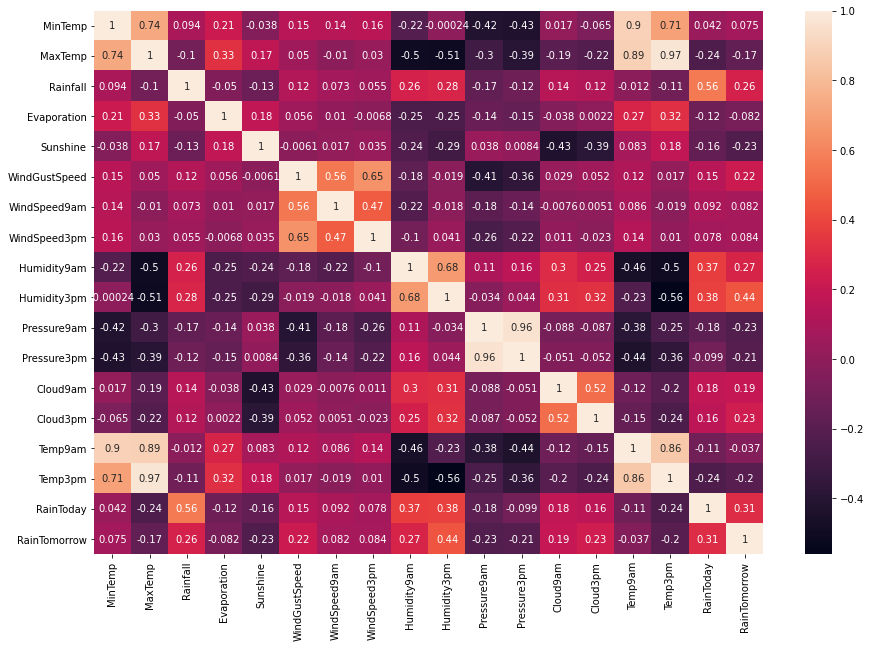

In [88]:
#Looking for highly correlated features
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

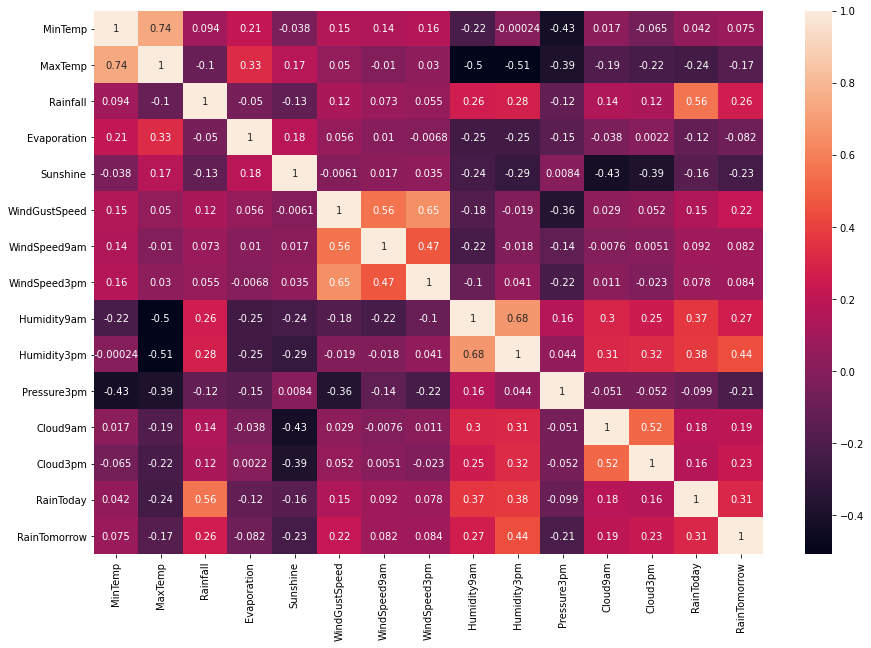

In [89]:
#Deleting redundant features
corr = ["Temp9am", "Temp3pm", "Pressure9am"]
df.drop(columns=corr, inplace=True, axis=1)
#Correlaton matrix after removing features
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [90]:
#Encoding categorial columns
cat_cols  = df.loc[:, df.select_dtypes(include="category").columns]
target = df.loc[:, "RainTomorrow"]
target_enc = ce.TargetEncoder().fit(cat_cols, target)
encoded = target_enc.transform(cat_cols)

#Joining encoded data to main DF
df.drop(columns=df.select_dtypes(include="category").columns, inplace=True, axis=1)
df = df.join(encoded)

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



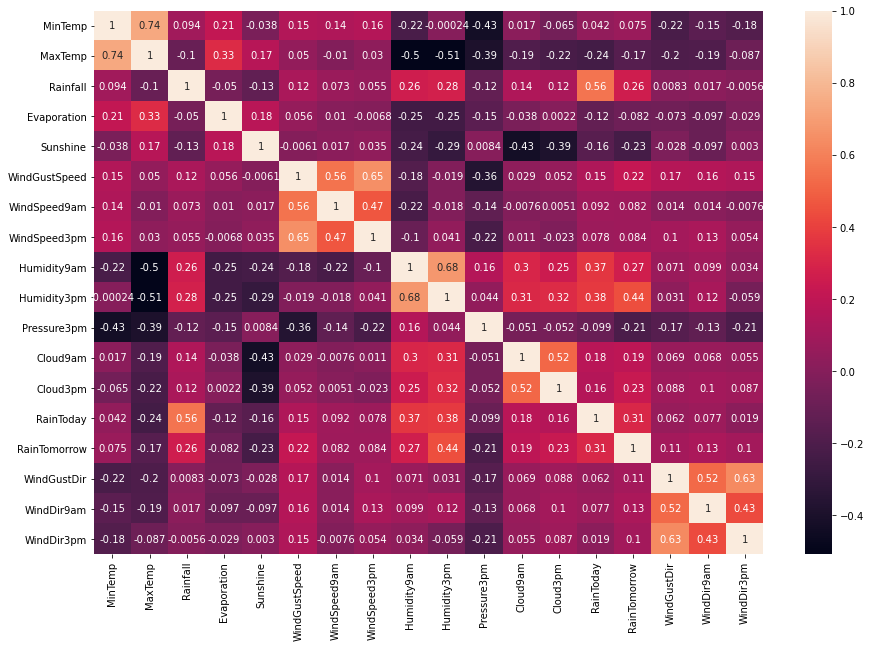

In [91]:
#Looking for highly correlated features after encoding
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [92]:
#Splitting data
features = df.loc[:, df.columns != "RainTomorrow"]
target = df.RainTomorrow
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

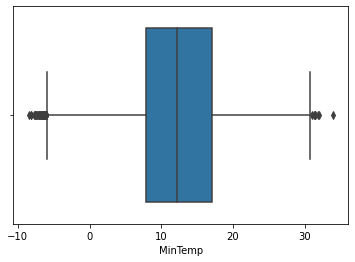

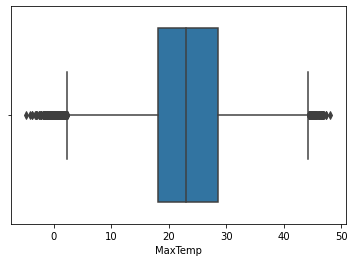

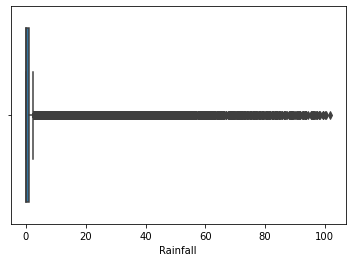

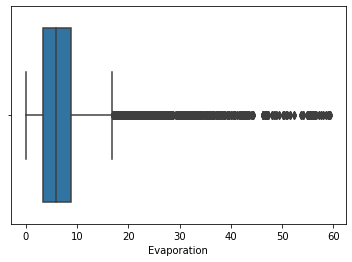

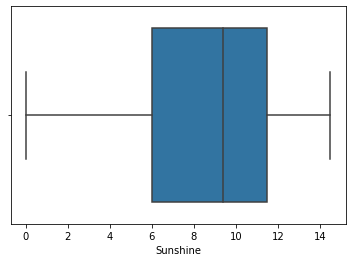

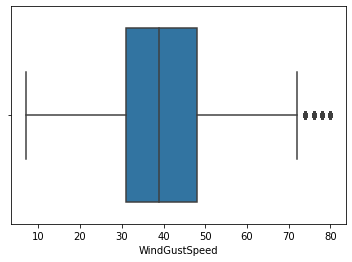

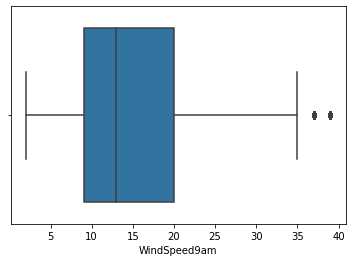

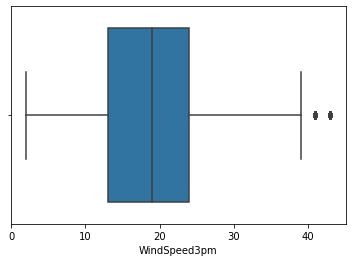

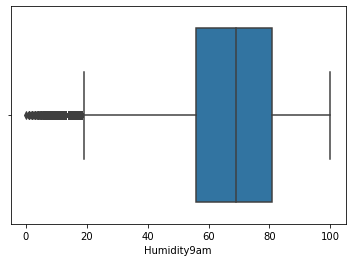

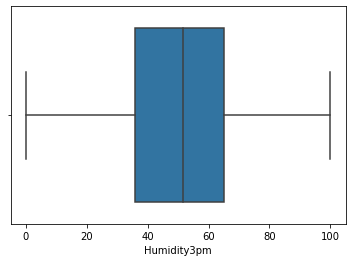

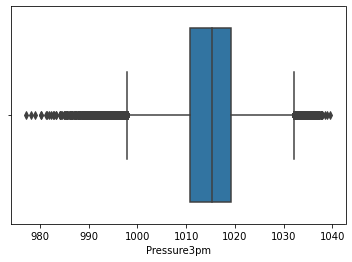

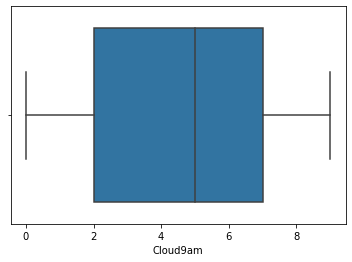

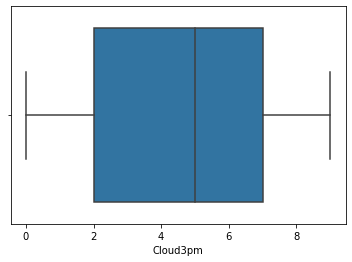

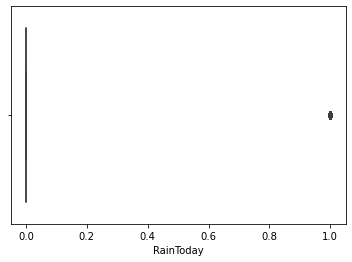

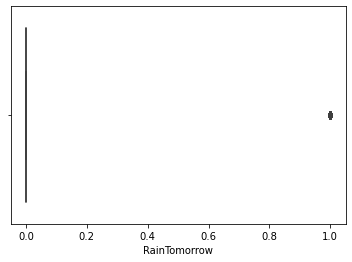

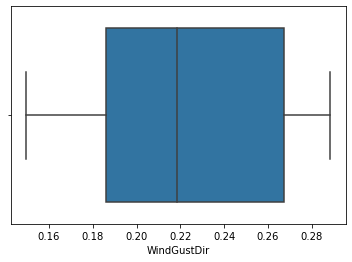

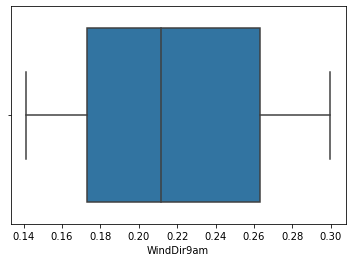

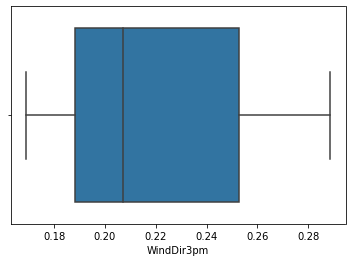

In [93]:
#Looking at data
for col in df.columns:
    sns.boxplot(x=df[col])
    plt.show()

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126840 entries, 0 to 126839
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        126840 non-null  float64
 1   MaxTemp        126840 non-null  float64
 2   Rainfall       126840 non-null  float64
 3   Evaporation    126840 non-null  float64
 4   Sunshine       126840 non-null  float64
 5   WindGustSpeed  126840 non-null  float64
 6   WindSpeed9am   126840 non-null  float64
 7   WindSpeed3pm   126840 non-null  float64
 8   Humidity9am    126840 non-null  float64
 9   Humidity3pm    126840 non-null  float64
 10  Pressure3pm    126840 non-null  float64
 11  Cloud9am       126840 non-null  float64
 12  Cloud3pm       126840 non-null  float64
 13  RainToday      126840 non-null  float64
 14  RainTomorrow   126840 non-null  float64
 15  WindGustDir    126840 non-null  float64
 16  WindDir9am     126840 non-null  float64
 17  WindDir3pm     126840 non-nul

In [95]:
#Scaling data
with_outliers = ["Rainfall", "Evaporation"]
robust = RobustScaler(quantile_range=(1, 99))
x_train[with_outliers] = robust.fit_transform(x_train[with_outliers])
x_test[with_outliers] = robust.transform(x_test[with_outliers])


cols = df.select_dtypes(include="float64").drop(columns=["Evaporation", \
                                                         "Rainfall", \
                                                         "RainToday", \
                                                         "RainTomorrow"], axis=1).columns
min_max = MinMaxScaler()
x_train[cols] = min_max.fit_transform(x_train[cols])
x_test[cols] = min_max.transform(x_test[cols])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [96]:
x_train.describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  101472.000000  101472.000000  101472.000000  101472.000000   
mean        0.517959       0.534381       0.062363       0.044375   
std         0.156773       0.135467       0.196471       0.221512   
min         0.000000       0.000000       0.000000      -0.260090   
25%         0.403465       0.432892       0.000000      -0.107623   
50%         0.512229       0.525520       0.000000       0.000000   
75%         0.631188       0.631380       0.027778       0.134529   
max         1.000000       1.000000       2.827778       2.403587   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  101472.000000  101472.000000  101472.000000  101472.000000   
mean        0.573309       0.455808       0.345607       0.413899   
std         0.265667       0.170407       0.209834       0.197307   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.413793       0.328767       0.189189       0.268293   
50%         0.648276       0.438356       0.297297       0.414634   
75%         0.793103       0.561644       0.486486       0.536585   
max         1.000000       1.000000       1.000000       1.000000   

         Humidity9am    Humidity3pm    Pressure3pm       Cloud9am  \
count  101472.000000  101472.000000  101472.000000  101472.000000   
mean        0.677299       0.509727       0.594181       0.498936   
std         0.189406       0.207957       0.110304       0.313297   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.560000       0.360000       0.523102       0.222222   
50%         0.688808       0.515391       0.598282       0.555556   
75%         0.810000       0.650000       0.663366       0.777778   
max         1.000000       1.000000       1.000000       1.000000   

            Cloud3pm      RainToday    WindGustDir     WindDir9am  \
count  101472.000000  101472.000000  101472.000000  101472.000000   
mean        0.508754       0.221214       0.507883       0.497810   
std         0.293160       0.415066       0.324955       0.336116   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.222222       0.000000       0.264568       0.201251   
50%         0.555556       0.000000       0.496569       0.444091   
75%         0.777778       0.000000       0.849056       0.767862   
max         1.000000       1.000000       1.000000       1.000000   

          WindDir3pm  
count  101472.000000  
mean        0.426935  
std         0.344800  
min         0.000000  
25%         0.161876  
50%         0.319371  
75%         0.699575  
max         1.000000

In [98]:
#Creating selector object and fitting
select_k_best = SelectKBest(score_func=f_classif, k=7).fit(x_train, y_train)

#View of selected columns
cols_new = select_k_best.get_support(indices=True)
new_df = x_train.iloc[:, cols_new]
new_df

TypeError: The score function should be a callable, ['f_classif', 7] (<class 'list'>) was passed.